In [2]:
import datetime as dt

import yfinance as yf

TODAY = dt.date.today()

TK = input("Enter ticker symbol: ")
DATA = yf.download(TK, start="2023-06-01", end=TODAY)


[*********************100%***********************]  1 of 1 completed


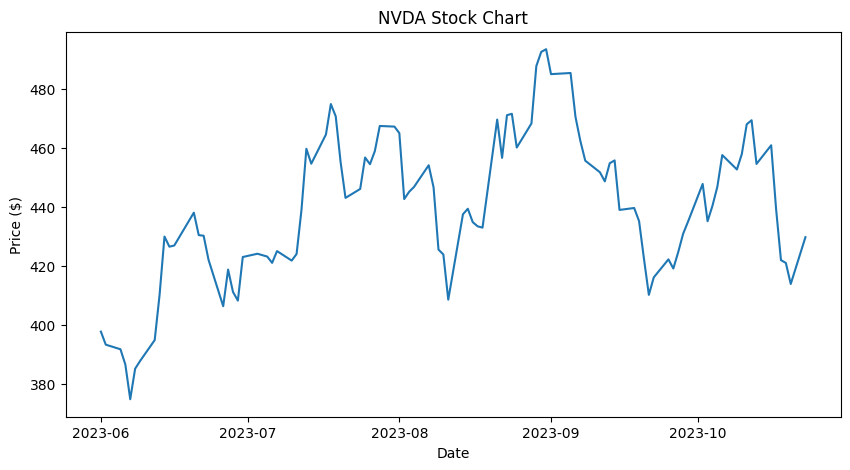

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(DATA["Close"])
plt.title(f"{TK} Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()


## Differences between python 3.11 and 3.12

- Note: change this to a proper note document.

---

In 3.11x, PEP 695: type param syntax and the type statement required:

```python
# 3.11
from typing import TypeVar
T = Typevar('T')

def min_max(a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a
```

You had to import your **Type** **Var**iable from the typing module, then had to make sure the name that you assign it to matches the name in quotes. This is no longer necessary in 3.12x.

```python
			#### 3.12 ####
def min_max[T](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a

# multiple type variables
def min_max[T, U, V](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a

# TypeVarTuples like this
def min_max[T, *Ts](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a

# ParamSpecs like this
def min_max[T, **P](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a

# constrained the allowed types like this
def min_max[T: float](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a
# or like this
def min_max[T: (float, int)](a: T, b: T) -> Tuple[T, T]:
	return a, b if a <= b else b, a
```


In [ ]:
"""
__3.11__
The syntax is even more convenient for defining generic classes
"""
from dataclasses import dataclass
from collections.abc import Sequence
from typing import TypeVar, Generic
T = TypeVar('T', covariant=True)

@dataclass
class SubSequence[T]:
    seq: Sequence[T]
    low: int
    high: int

    def __getitem__(self, item: int) -> T:
        if not self.low <= item < self.high:
            raise IndexError(item)
        return self.seq[self.low + item]


# Compared to 3.12 below, no need to know covariance


In [ ]:
"""
__3.12__
The syntax is even more convenient for defining generic classes
"""
from dataclasses import dataclass
from collections.abc import Sequence

@dataclass
class SubSequence[T]:
    seq: Sequence[T]
    low: int
    high: int

    def __getitem__(self, item: int) -> T:
        if not self.low <= item < self.high:
            raise IndexError(item)
        return self.seq[self.low + item]


- IntOrErrMsg: TypeAlias = "Expected[int, str]" # DEPRECATED

```python
type IntOrErrMsg = Expected[int, str]
type ResultorErrno[T] = Expected[T, int]

class Expected[T, Err]:
    ...

# For all the static typing loving guys.

# PEP 701: F-Strings in the grammar
def fstr_ex():
    ppl = ["Alice", "Bob", "Charlie"]
    return f"hello there {", ".join(ppl)}"

# This doesnt work in 3.11, hence the error, but it does work in 3.12
# As you can see it doesnt work w/ different quotes either. it breaks the grammar.
def fstr_ex():
    ppl = ["Alice", "Bob", "Charlie"]
    return f'hello there {", ".join(ppl)}'
```

## **Python 3.12 brings per-interpreter gil & low impact monitoring to the language, along with a few other "featurettes":**

- Runtime "Quickening"
  - Slow instructions are replaced with faster specialiezd versions at runtime.
  - Part of the faster CPython
- Better Type error messages
- PEP 693: Immortal Objects
  - Large projects (ex. 2B users) beneifit from this w/ better read and write forking ability.
  - ex:

```python
import sys

def main():
    my_lst = [1, 2, 3]
    print(sys.getrefcount(my_lst))  # 2
    use_my_lst(my_lst)

def use_lst(lst):
    print(sys.getrefcount(lst))  # 3

if __name__ == "__main__":
    main()
```

    - All of the above are each time the refcount was added to, adding to the number of writes the interpreter will have to do.
    - All of which will trash the cache && ruin your day.

- With **Immortal Objects** 'twiddle' one of the high bits in an objects ref count and _poof_ its now 'Immortal'.
- 0000000000000000000000000000000 **1** 11111111111111111111111111111111
  - the **immortal bit**, makes every bit after it also immortal, so the ref count will never change, as they dont participate in it.
  - They dont participate in ref counting becaues they're meant to live until interpreter shutdown.

## Pep 709: Comprehension inlining

- example done in ./comprehension_inlining.py

```python
import comp from ./comprehension_inlining
```
